<a href="https://colab.research.google.com/github/swapnilpriya/Hotel-Booking-Analysis/blob/main/SWAPNIL_GUNDEWAR_FINAL_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [95]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Reading the csv file
df = pd.read_csv("/content/drive/MyDrive/CAPSTONE-1/Hotel Bookings.csv") 

In [98]:
# view the data 
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [99]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [100]:
# analysing the parametrs of the data 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [101]:
# Creating a copy of dataframe
df1 =df.copy()

First, we will try to understand the contents and meanings of all columns of the dataframe. For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [102]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [103]:
df1['is_canceled'].unique()

array([0, 1])

In [104]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [105]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [106]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [107]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [108]:
# This column has 0 as well as null
df1['children'].unique()    

array([ 0.,  1.,  2., 10.,  3., nan])

Cleaning data
Cleaning data is important step before EDA as it will remove the vague data which can affect the outcome of EDA.

While cleaning data we will perform following steps: 
 1) Remove duplicate rows 
 2) Handling missing values
 3) Convert columns to appropriate datatypes
 4) Adding important columns

# **# Step 1: Removing duplicate rows if any**

In [109]:
# Show number of rows of duplicate row
df1[df1.duplicated()].shape   

(31994, 32)

In [110]:
# Removing duplicate values
df1.drop_duplicates(inplace = True)


In [111]:
df1.shape

(87396, 32)

# **Step 2: Handling missing values**

In [112]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [114]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [115]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. Hence, 'nan' values are the missing values due to error of recording data. We will replace the null values under this column with mean value of children.

In [116]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer. Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [117]:
df1['country'].fillna('others', inplace = True)

In [118]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [119]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [120]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

# **Step 3: Converting columns to appropriate datatypes**

In [121]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [122]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

# **Step 4: Adding important columns**

We are adding this column so that we can analyse the stay length at hotels.

In [123]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

# **Exploratory Data Analysis**

First we will find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we won't check them for correlation

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [124]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

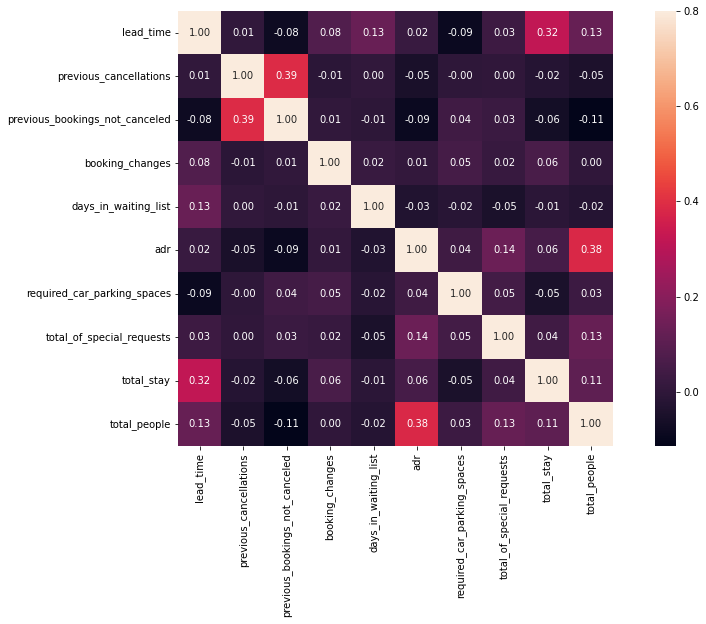

In [125]:
# Correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

From the correlation matrix following observations can be drawn

1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

Now, let's see does length of stay affects the adr

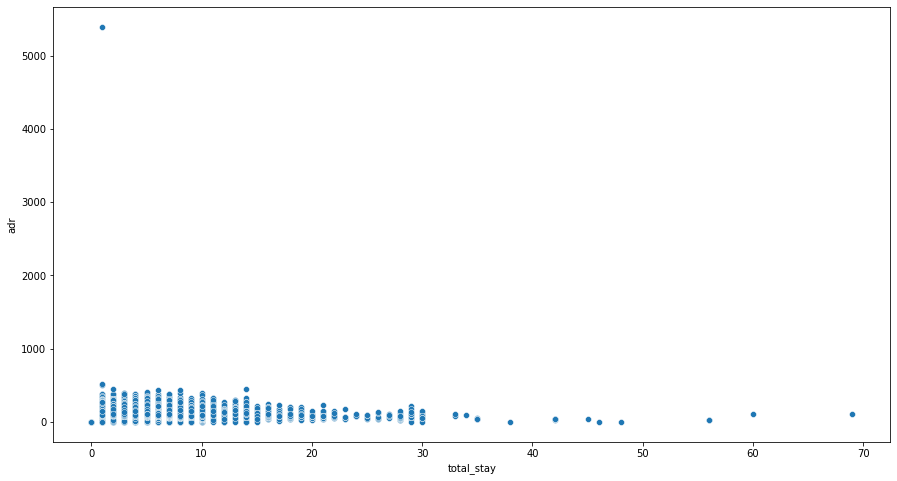

In [126]:
plt.figure(figsize = (15,8))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot, there is an outlier in adr, so we will remove that for better scatter plot

In [127]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

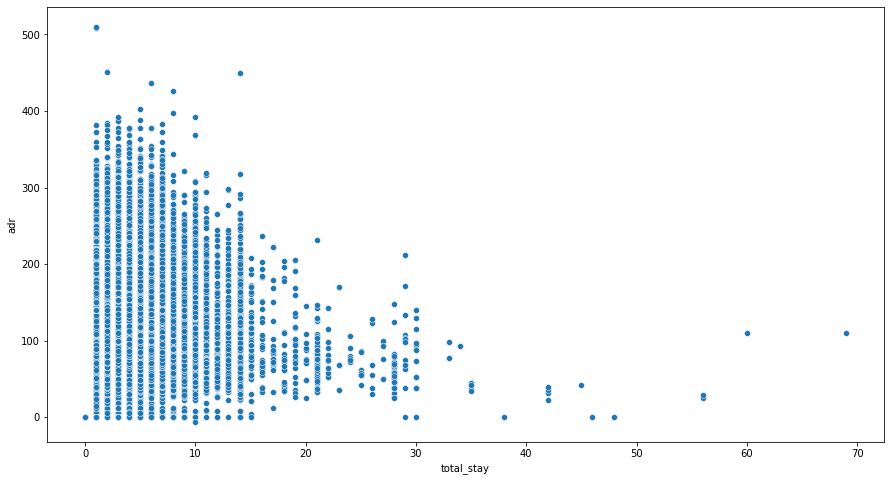

In [128]:
plt.figure(figsize = (15,8))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

# **Univariate Analysis**
Q1) Which agent makes most no. of bookings?

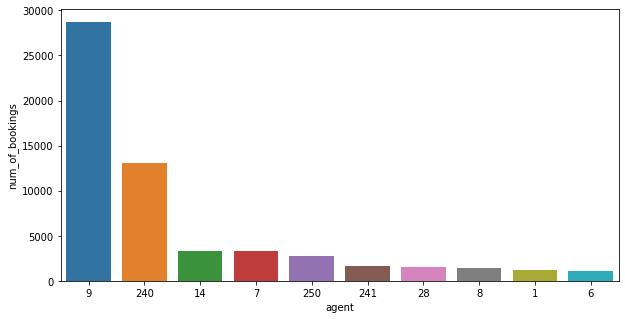

In [129]:
d1 = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

From the bar plot, agent number 9 found to have most number of bookings
Q2) Which room type is in most demand and which room type generates highest adr?

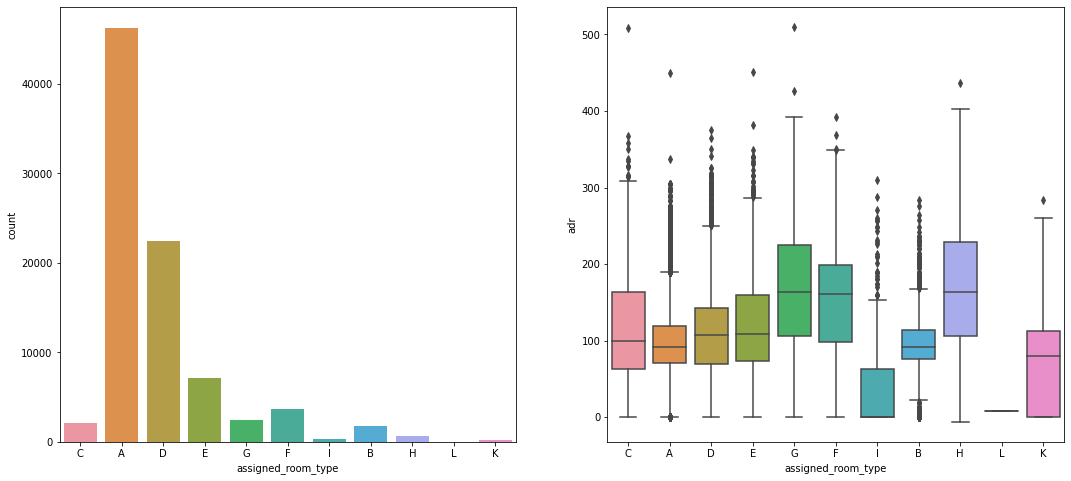

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
plt.show()

 From bar plot, most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the number of room types A and H to maximise revenue.

Q3) Which meal type is most preffered meal of customers?

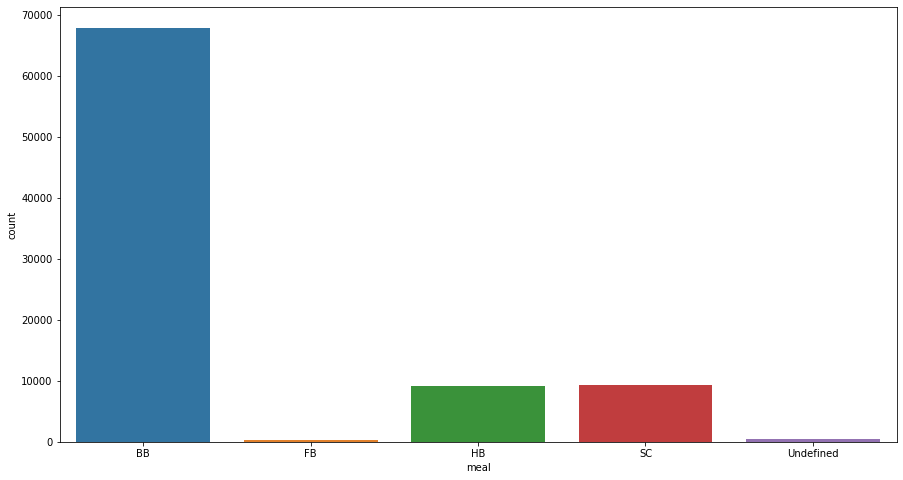

In [132]:
plt.figure( figsize=(15, 8))

sns.countplot(x = df1['meal'])
plt.show()

Bar plot indicating Most preferred meal type is BB (Bed and breakfast)

# **Hotel wise analysis**
Q1) What is percentage of bookings in each hotel?